#### Importy

In [141]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

# Statistical Modeling
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Dash Framework and Components
import dash
from dash.dependencies import Input, Output, State
from dash import dash_table
from dash import html
from dash import dcc

#### Wczytywanie danych

In [142]:
df = pd.read_csv('messy_data.csv')

In [143]:
print(df)

     carat  clarity  color         cut  x dimension  y dimension  z dimension  \
0     0.50       IF      D       Ideal          5.1         5.15          3.2   
1     0.70     vvs2      E     premium          5.7                      3.52   
2      NaN      Si2      h        Good          4.3         4.31                
3     1.20       if      d       ideal                      6.82          4.2   
4     0.90       I1      J        Fair            6                       3.7   
..     ...      ...    ...         ...          ...          ...          ...   
195   0.45      si1      F   very good          4.9         4.89                
196   1.25     VVS2      H        Good          6.9                      4.27   
197   0.55       i1      I     Premium          5.3                      3.28   
198   0.85      Si2      E        fair          6.1         6.13         3.78   
199    NaN     VVS1      G   Very good          6.4         6.43         3.97   

     depth  table    price 

## 1.	Wstępna analiza danych i czyszczenie

#### 1. f) Wsępna analiza

<sub>Tabela zawiera informacje dotyczące diamentów. Każdy wiersz reprezentuje diament, a kolumny dostarczają szczegółów na temat karatów, czystości, koloru, szlifu, wymiarów (x, y i z), głębokości i ceny diamentu.

<sub>Oto rozbicie zawartości kolumn:

<sub>"Karat" odnosi się do wagi diamentu, mierzonej w karatach.

<sub>"Czystość" opisuje poziom niedoskonałości w diamentach

<sub>"Kolor" wskazuje stopień koloru diamentu

<sub>"Szlif" reprezentuje jakość szlifu diamentu

<sub>"Wymiar X", "wymiar Y" i "wymiar Z" podają odpowiednio długość, szerokość i wysokość diamentu.

<sub>"Głębokość" odnosi się do stosunku głębokości diamentu (wymiar Z) do jego średnicy (wymiary X i Y).

<sub>"Stół" wskazuje szerokość górnego płasku diamentu (stołu) w stosunku do całkowitej średnicy.

<sub>"Cena" reprezentuje koszt diamentu w podanej walucie.

#### 1. f) Usunięcie niepotrzebnych spacji z nazw kolumn

In [144]:
df = df.rename(columns=lambda x: x.strip())

In [145]:
print(df.columns)

Index(['carat', 'clarity', 'color', 'cut', 'x dimension', 'y dimension',
       'z dimension', 'depth', 'table', 'price'],
      dtype='object')


#### 1. f) Usunięcie niepotrzebnych spacji z danych

In [146]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [147]:
print(df.head())

   carat clarity color      cut x dimension y dimension z dimension depth  \
0    0.5      IF     D    Ideal         5.1        5.15         3.2  61.5   
1    0.7    vvs2     E  premium         5.7                    3.52    62   
2    NaN     Si2     h     Good         4.3        4.31              62.3   
3    1.2      if     d    ideal                    6.82         4.2  61.7   
4    0.9      I1     J     Fair           6                     3.7  61.7   

  table  price  
0         3000  
1    59   4500  
2    56    700  
3    58  10000  
4         2400  


#### 1. f) Porządkowanie wielkości liter

In [148]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [149]:
print(df.head())

   carat clarity color      cut x dimension y dimension z dimension depth  \
0    0.5      if     d    ideal         5.1        5.15         3.2  61.5   
1    0.7    vvs2     e  premium         5.7                    3.52    62   
2    NaN     si2     h     good         4.3        4.31              62.3   
3    1.2      if     d    ideal                    6.82         4.2  61.7   
4    0.9      i1     j     fair           6                     3.7  61.7   

  table  price  
0         3000  
1    59   4500  
2    56    700  
3    58  10000  
4         2400  


#### Cast do odpowiednich typów danych

In [150]:
df['x dimension'] = pd.to_numeric(df['x dimension'], errors='coerce')
df['y dimension'] = pd.to_numeric(df['y dimension'], errors='coerce')
df['z dimension'] = pd.to_numeric(df['z dimension'], errors='coerce')
df['depth'] = pd.to_numeric(df['depth'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#### 1. f) Znalezienie wszystkich możliwych kolorów

In [151]:
unique_values = df['color'].unique()
print(unique_values)

['d' 'e' 'h' 'j' 'g' 'f' 'i' 'colorless']


Możliwe kolory: 'd' 'e' 'h' 'j' 'g' 'f' 'i' 'colorless'

#### 1. f) Znalezienie wszystkich możliwych clarity

In [152]:
unique_values = df['clarity'].unique()
print(unique_values)

['if' 'vvs2' 'si2' 'i1' 'si1' 'vvs1']


Możliwe clarity: 'if' 'vvs2' 'si2' 'i1' 'si1' 'vvs1'

#### 1. f) Znalezienie wszystkich możliwych cut

In [153]:
unique_values = df['cut'].unique()
print(unique_values)

['ideal' 'premium' 'good' 'fair' 'very good']


Mozliwe cut: 'ideal' 'premium' 'good' 'fair' 'very good'

#### 1. f) Znalezienie wszystkich możliwych table

In [154]:
unique_values = df['table'].unique()
print(unique_values)

['' '59' '56' '58' '57' '54' '60' '55']


Możliwe table: '59' '56' '58' '57' '54' '60' '55'

#### 1. a) Duplikaty

Sprawdzenie czy są duplikaty danych

In [155]:
has_duplicates = df.duplicated().any()

# Print the result
if has_duplicates:
    print("DataFrame contains duplicates")
else:
    print("DataFrame does not contain duplicates")

DataFrame does not contain duplicates


#### 1 b) Wartości odstające

In [156]:
#function that will be used to calcultate and print values 
def find_outliers(column_name):

    mean = df[column_name].mean()
    std = df[column_name].std()

    threshold = 2

    upper_bound = mean + (threshold * std)
    lower_bound = mean - (threshold * std)

    return df[(df[column_name] > upper_bound) | (df[column_name] < lower_bound)]

In [157]:
column_name = 'carat'

outliers = find_outliers(column_name)

print(outliers)

    carat clarity color   cut  x dimension  y dimension  z dimension  depth  \
24    1.6      i1     i  fair          7.3         7.28          4.5    NaN   
31    1.5    vvs2     f  good          7.2         7.18          NaN   62.7   

   table    price  
24    54   3400.0  
31    59  10800.0  


In [158]:
column_name = 'x dimension'

outliers = find_outliers(column_name)

In [159]:
column_name = 'y dimension'

outliers = find_outliers(column_name)

In [160]:
column_name = 'z dimension'

outliers = find_outliers(column_name)

In [161]:
column_name = 'price'

outliers = find_outliers(column_name)

In [162]:
print(df.select_dtypes(include=['number', 'float']).columns)

Index(['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'price'], dtype='object')


#### 1. f) Uzupełnienie braków w depth

Zauważyłem zależność wartościami w kolumnie depth "Głębokość" a kolumnami x y z, depth odnosi się do stosunku głębokości diamentu (z) do jego średnicy (x i y)

In [163]:
df.loc[df['depth'].isnull() & ~df[['x dimension', 'y dimension', 'z dimension']].isnull().any(axis=1), 'depth'] = df['z dimension'] / ((df['x dimension'] + df['y dimension']) / 2) * 100

# Truncate the values in the "depth" column to one digit after the decimal point
df['depth'] = df['depth'].apply(lambda x: round(x, 1) if pd.notnull(x) else None)

#### 1. f) Uzupełnienie braków w x dimension

In [164]:
# Uzupełnianie wartości 'x_dimension' na podstawie 'y_dimension' i 'z_dimension'
df.loc[df['x dimension'].isnull() | (df['x dimension'] == ''), 'x dimension'] = \
    ((2 * df['z dimension']) / (df['depth'] / 100)) - df['y dimension']

# Truncate the values in the "depth" column to one digit after the decimal point
df['x dimension'] = df['x dimension'].apply(lambda x: round(x, 1) if pd.notnull(x) else None)

#### 1. f) Uzupełnienie braków w y dimension

In [165]:
# Uzupełnianie wartości 'y dimension' na podstawie 'x_dimension' i 'z_dimension'
df.loc[df['y dimension'].isnull() | (df['y dimension'] == ''), 'y dimension'] = \
    ((2 * df['z dimension']) / (df['depth'] / 100)) - df['x dimension']

# Truncate the values in the "depth" column to one digit after the decimal point
df['y dimension'] = df['y dimension'].apply(lambda x: round(x, 1) if pd.notnull(x) else None)

#### 1. f) Uzupełnienie braków w z dimension

In [166]:
# Uzupełnianie wartości 'y dimension' na podstawie 'x_dimension' i 'z_dimension'
df.loc[df['z dimension'].isnull() | (df['z dimension'] == ''), 'z dimension'] = \
    ((df['x dimension'] * (df['depth'] / 100) + (df['depth'] / 100) * df['y dimension'])) / 2

# Truncate the values in the "depth" column to one digit after the decimal point
df['z dimension'] = df['z dimension'].apply(lambda x: round(x, 1) if pd.notnull(x) else None)

#### 1 F) Wartości odstające po uzupewnieniu kolumn

In [167]:
column_name = 'z dimension'

outliers = find_outliers(column_name)

print(outliers)

    carat clarity color        cut  x dimension  y dimension  z dimension  \
25    0.2     si1     h  very good          3.9          3.9          2.4   

    depth table  price  
25   62.1        500.0  


In [168]:
column_name = 'y dimension'

outliers = find_outliers(column_name)

print(outliers)

    carat clarity color        cut  x dimension  y dimension  z dimension  \
2     NaN     si2     h       good          4.3          4.3          2.7   
8     NaN     si2     i       good          4.3          4.3          2.7   
25    0.2     si1     h  very good          3.9          3.9          2.4   

    depth table  price  
2    62.3    56  700.0  
8    62.3          NaN  
25   62.1        500.0  


In [169]:
column_name = 'x dimension'

outliers = find_outliers(column_name)

print(outliers)

    carat clarity color        cut  x dimension  y dimension  z dimension  \
2     NaN     si2     h       good          4.3          4.3          2.7   
8     NaN     si2     i       good          4.3          4.3          2.7   
25    0.2     si1     h  very good          3.9          3.9          2.4   

    depth table  price  
2    62.3    56  700.0  
8    62.3          NaN  
25   62.1        500.0  


In [170]:
column_name = 'depth'

outliers = find_outliers(column_name)

print(outliers)

    carat clarity color        cut  x dimension  y dimension  z dimension  \
0     0.5      if     d      ideal          5.1          5.2          3.2   
5     NaN     si1     g  very good          5.9          5.9          3.6   
6     0.5      if     d      ideal          5.1          5.3          3.2   
7     0.4    vvs1     f       good          4.8          4.8          3.0   
11    0.4    vvs2     g  very good          4.9          4.9          3.0   
15    NaN    vvs2     i       good          4.4          4.4          2.7   
21    1.3     si1     g    premium          6.9          6.8          4.3   

    depth table    price  
0    61.5         3000.0  
5    61.4    57   4200.0  
6    61.5    57   3100.0  
7    61.5         1500.0  
11   61.2    56   1400.0  
15   61.3    57      NaN  
21   63.0    60  10500.0  


#### d) Braki w danych

In [171]:
missing_values = df[df.isnull().any(axis=1) | (df == '').any(axis=1)]

print(missing_values)

     carat clarity color        cut  x dimension  y dimension  z dimension  \
0     0.50      if     d      ideal          5.1          5.2          3.2   
2      NaN     si2     h       good          4.3          4.3          2.7   
4     0.90      i1     j       fair          6.0          6.0          3.7   
5      NaN     si1     g  very good          5.9          5.9          3.6   
7     0.40    vvs1     f       good          4.8          4.8          3.0   
..     ...     ...   ...        ...          ...          ...          ...   
190   0.65     si2     f  very good          5.5          NaN          3.4   
191   1.15    vvs1     g    premium          6.8          6.8          4.2   
193    NaN    vvs2     e       good          6.3          NaN          3.9   
196   1.25    vvs2     h       good          6.9          NaN          4.3   
199    NaN    vvs1     g  very good          6.4          6.4          4.0   

     depth table    price  
0     61.5         3000.0  
2     6

Można wyciągnąć kilka wniosków. Braki danych są powszechne, istnieje duży obszar nieznanych informacji, braki danych mogą drastycznie wpływać na reprezentatywność próbki.

Najwięcej braków danych wystepuje w kolumnie table, dlatego podjąłem decyzje nie wykorzystywać kolumnę table w modelu regresji

In [172]:
df_without_table = df.drop('table', axis=1)

missing_values_without_table = df_without_table[df_without_table.isnull().any(axis=1) | (df_without_table == '').any(axis=1)]

print(missing_values_without_table)

     carat clarity      color        cut  x dimension  y dimension  \
2      NaN     si2          h       good          4.3          4.3   
5      NaN     si1          g  very good          5.9          5.9   
8      NaN     si2          i       good          4.3          4.3   
9     1.00    vvs1          f      ideal          6.4          NaN   
10    0.50     si1  colorless    premium          5.2          5.2   
..     ...     ...        ...        ...          ...          ...   
189    NaN    vvs2          d       fair          6.7          6.6   
190   0.65     si2          f  very good          5.5          NaN   
193    NaN    vvs2          e       good          6.3          NaN   
196   1.25    vvs2          h       good          6.9          NaN   
199    NaN    vvs1          g  very good          6.4          6.4   

     z dimension  depth     price  
2            2.7   62.3     700.0  
5            3.6   61.4    4200.0  
8            2.7   62.3       NaN  
9            4.

### 2.	Wizualizacja rozkładu zmiennych, zależności ceny od innych zmiennych, liczebność kategorii

Rozkład zmiennych

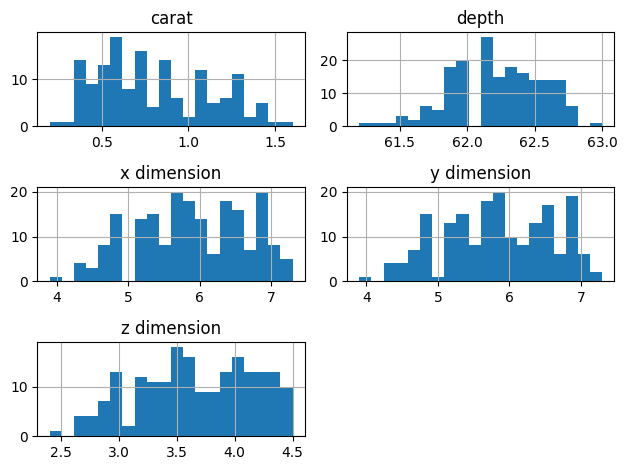

In [173]:
# Visualize the distribution of carat, depth, x dimension, y dimension, z dimension
df[['carat', 'depth', 'x dimension', 'y dimension', 'z dimension']].hist(bins=20)
plt.tight_layout()
plt.show()

Zależności ceny od innych zmiennych

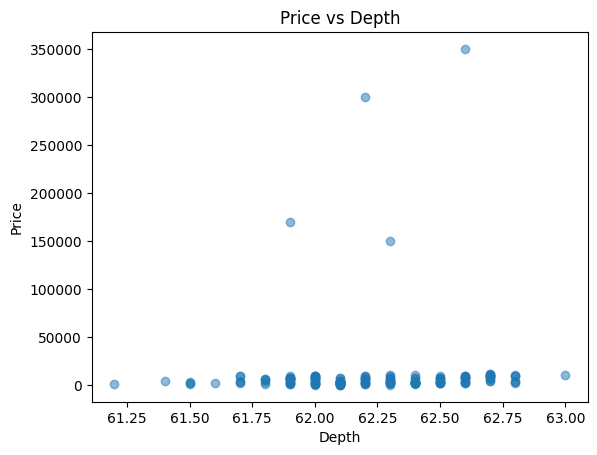

In [174]:
plt.scatter(df['depth'], df['price'], alpha=0.5)
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Price vs Depth')
plt.show()

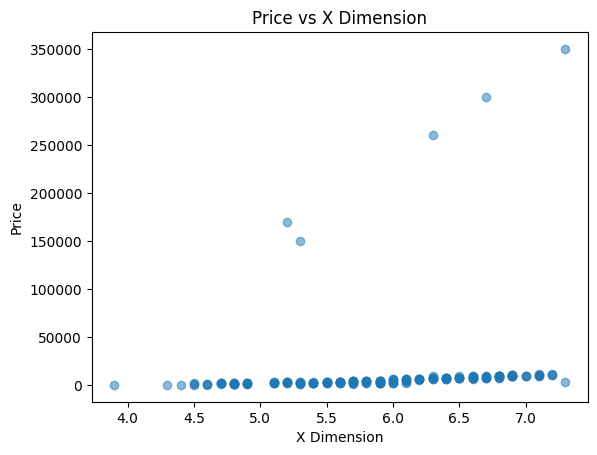

In [175]:
plt.scatter(df['x dimension'], df['price'], alpha=0.5)
plt.xlabel('X Dimension')
plt.ylabel('Price')
plt.title('Price vs X Dimension')
plt.show()

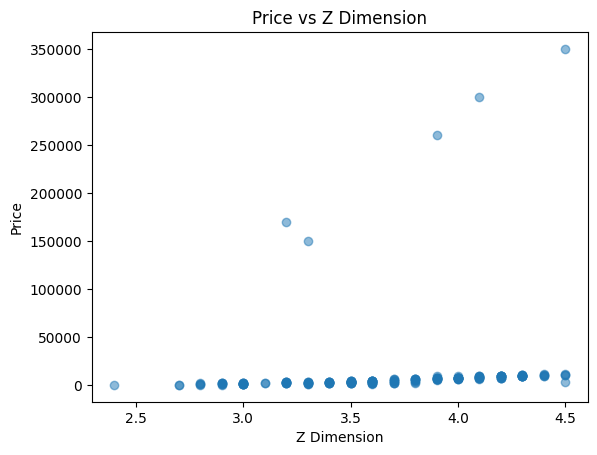

In [176]:
plt.scatter(df['z dimension'], df['price'], alpha=0.5)
plt.xlabel('Z Dimension')
plt.ylabel('Price')
plt.title('Price vs Z Dimension')
plt.show()

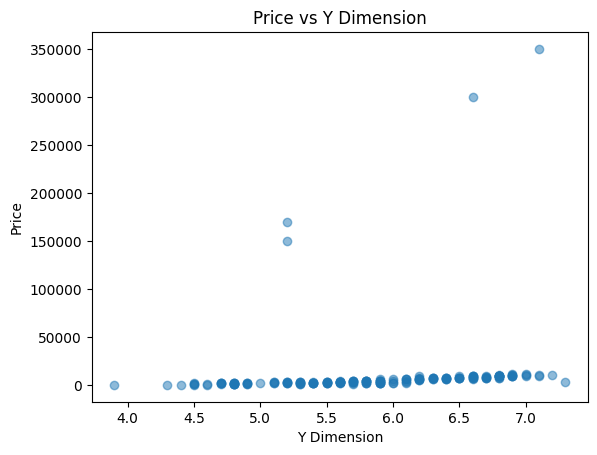

In [177]:
plt.scatter(df['y dimension'], df['price'], alpha=0.5)
plt.xlabel('Y Dimension')
plt.ylabel('Price')
plt.title('Price vs Y Dimension')
plt.show()

Na powyzszych obrazkach widać wartości odstające który negatywnie wpływają na model regresji i spójność danych

Liczebność kategorii

In [178]:
def calculate_category_counts(dataframe):
    category_counts = {}
    for column in dataframe.columns:
        category_counts[column] = dataframe[column].value_counts()
    
    return category_counts

# Obliczanie liczebności kategorii dla każdej kolumny
category_counts = calculate_category_counts(df)
for column, counts in category_counts.items():
    print(f"Column '{column}':\n{counts}\n")

Column 'carat':
carat
0.50    13
0.55    12
0.40    10
0.45     9
1.05     8
0.65     8
0.70     8
0.75     8
0.85     7
1.30     7
0.60     7
0.90     7
1.20     6
0.95     6
1.40     5
1.15     5
1.25     4
0.80     4
0.35     4
1.10     4
1.00     2
1.35     2
1.50     1
0.20     1
0.30     1
1.60     1
Name: count, dtype: int64

Column 'clarity':
clarity
si2     44
vvs2    37
vvs1    35
i1      31
si1     30
if      23
Name: count, dtype: int64

Column 'color':
color
g            40
h            34
i            33
f            30
e            25
d            22
j             8
colorless     8
Name: count, dtype: int64

Column 'cut':
cut
good         51
premium      41
very good    40
fair         36
ideal        32
Name: count, dtype: int64

Column 'x dimension':
x dimension
5.9    11
6.9    10
6.8    10
5.7    10
5.6    10
6.3     9
4.8     9
6.4     9
6.6     9
5.5     8
5.2     8
5.3     8
6.1     7
5.8     7
6.5     7
5.4     7
6.0     7
6.7     7
6.2     6
5.1     6
4.9     6


### 3.	Budowa modelu regresji ceny od pozostałych zmiennych

In [179]:
df_clean = df_without_table.dropna()

In [180]:
dfreg = df_clean.copy()

W celu polepszenia jakości modelu zdecydowałem usunąć wartości odstajace r data frame, również nie  wykorzystuję kolumnę table dlatego że braki w danych w tej kolumnie pogarszją jakośc regresji

Skrypt który usuwa wartości odstające

In [181]:
def remove_outliers(df, column, threshold):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    filtered_df = df[z_scores < threshold]
    return filtered_df

# Example usa
dfreg_filtered1 = remove_outliers(dfreg, 'depth', threshold=2)
dfreg_filtered2 = remove_outliers(dfreg_filtered1, 'x dimension', threshold=2)
dfreg_filtered3 = remove_outliers(dfreg_filtered2, 'y dimension', threshold=2)
dfreg_filtered4 = remove_outliers(dfreg_filtered3, 'z dimension', threshold=2)
dfreg_filtered5 = remove_outliers(dfreg_filtered4, 'price', threshold=2)
print("\nFiltered DataFrame (outliers removed):")
print(dfreg_filtered4)

dfreg_filtered = dfreg_filtered5


Filtered DataFrame (outliers removed):
     carat clarity color        cut  x dimension  y dimension  z dimension  \
1     0.70    vvs2     e    premium          5.7          5.7          3.5   
3     1.20      if     d      ideal          6.8          6.8          4.2   
4     0.90      i1     j       fair          6.0          6.0          3.7   
14    0.55     si2     h       good          5.3          5.3          3.3   
19    0.70      i1     j       fair          5.8          5.8          3.6   
..     ...     ...   ...        ...          ...          ...          ...   
192   0.40     si2     h       fair          4.7          4.7          2.9   
194   0.95     si1     g      ideal          6.4          6.4          4.0   
195   0.45     si1     f  very good          4.9          4.9          3.1   
197   0.55      i1     i    premium          5.3          5.2          3.3   
198   0.85     si2     e       fair          6.1          6.1          3.8   

     depth     price  


Aby dodać zmienną string do modelu regresji, musisz najpierw przekształcić ją na zmienną numeryczną, ponieważ modele regresji wymagają danych liczbowych.

In [182]:
calrity = dfreg_filtered[['clarity']]

label_encoder = LabelEncoder()

clarity_encoded = label_encoder.fit_transform(calrity)

C:\Users\Aromanen\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [183]:
color = dfreg_filtered[['color']]

label_encoder = LabelEncoder()

color_encoded = label_encoder.fit_transform(color)

C:\Users\Aromanen\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [184]:
cut = dfreg_filtered[['cut']]

label_encoder = LabelEncoder()

cut_encoded = label_encoder.fit_transform(cut)

C:\Users\Aromanen\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Buduję model regresji

In [185]:

X = dfreg_filtered[['x dimension', 'y dimension', 'z dimension', 'carat']]
y = dfreg_filtered['price']

X.loc[:,'clarity'] = clarity_encoded
X.loc[:,'color'] = color_encoded
X.loc[:,'cut'] = clarity_encoded

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu
model = LinearRegression()

# Trenowanie modelu na danych treningowych
results = model.fit(X_train, y_train)

# Przewidywanie wartości dla danych testowych
y_pred = model.predict(X_test)

# Obliczanie błędu średniokwadratowego
mse = mean_squared_error(y_test, y_pred)

# Wyświetlanie wyników
print(f'Współczynniki regresji: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Błąd średniokwadratowy: {mse}')

Współczynniki regresji: [ 6111.10085745 -3291.52055467  -624.26461977  2858.68845179
   107.09489871  -106.0659829    107.09489871]
Intercept: -11475.884439427642
Błąd średniokwadratowy: 1433246.7730461212


C:\Users\Aromanen\AppData\Local\Temp\ipykernel_18280\4067218415.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aromanen\AppData\Local\Temp\ipykernel_18280\4067218415.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aromanen\AppData\Local\Temp\ipykernel_18280\4067218415.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

### 4.	Wizualizacja modelu regresji

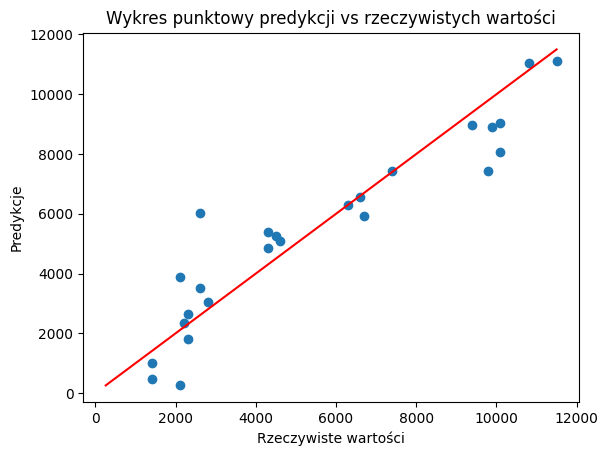

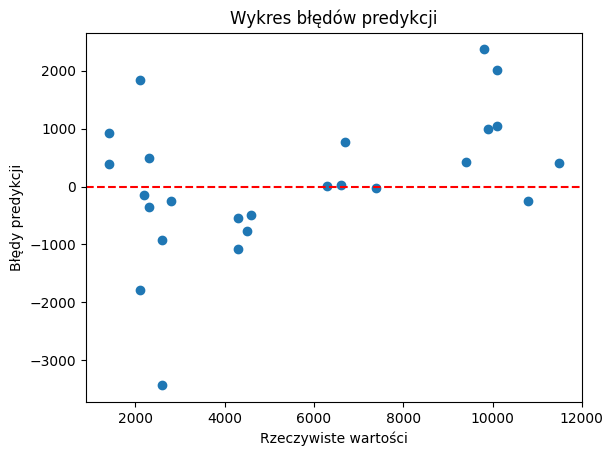

In [186]:
# Wykres punktowy predykcji vs rzeczywistych wartości
plt.scatter(y_test, y_pred)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Predykcje')
plt.title('Wykres punktowy predykcji vs rzeczywistych wartości')

# Dodanie linii idealnej predykcji
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.show()

# Wykres błędów predykcji
errors = y_test - y_pred
plt.scatter(y_test, errors)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Błędy predykcji')
plt.title('Wykres błędów predykcji')

plt.axhline(y=0, color='red', linestyle='--')
plt.show()

### 5. 	Stworzenie dashboardu 

http://127.0.0.1:8050/

In [187]:
app = dash.Dash(__name__, suppress_callback_exceptions=True)

# model regresji
scatter_plot = go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    marker=dict(color='blue'),
    name='Predictions vs Actual'
)

# Create line plot of ideal predictions
ideal_line = go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    marker=dict(color='red'),
    name='Ideal Predictions'
)

# Create scatter plot of prediction errors
error_plot = go.Scatter(
    x=y_test,
    y=y_test - y_pred,
    mode='markers',
    marker=dict(color='orange'),
    name='Prediction Errors'
)

# tablica
table = dash_table.DataTable(
    id='table',
    columns=[{"name": col, "id": col} for col in dfreg_filtered.columns],
    data=dfreg_filtered.to_dict('records'),
    page_size=10,  # Number of rows per page
    style_table={
        'overflowX': 'auto'  # Enable horizontal scroll if needed
    }
)

app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Nav([
        dcc.Link('Zależność ceny od innych zmiennych', href='/page1', style={'margin-right': '20px', 'color': 'blue', 'font-weight': 'bold', 'text-decoration': 'none'}),
        dcc.Link('Próbka danych', href='/page2', style={'margin-right': '20px', 'color': 'green', 'font-weight': 'bold', 'text-decoration': 'none'}), 
        dcc.Link('Wizualizacja modelu regresji', href='/page3', style={'margin-right': '20px', 'color': 'purple', 'font-weight': 'bold', 'text-decoration': 'none'}),
        dcc.Link('Rozkładu zmiennych', href='/page4', style={'margin-right': '20px', 'color': 'orange', 'font-weight': 'bold', 'text-decoration': 'none'})
    ]),
    html.Div(id='page-content')
    ], 
    style={
        'font-family': 'Arial, sans-serif',
        'padding': '30px'
    }
)

@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('dropdown-variables', 'value')]
)
def update_scatter_plot(selected_variable):
    fig = px.scatter(dfreg_filtered, x=selected_variable, y='price', title='Scatter Plot')
    return fig

#distribution callback
@app.callback(
    Output('histogram', 'figure'),
    [Input('dropdown-variable-distribution', 'value')]
)
def update_histogram(selected_variable):
    return {
        'data': [
            go.Histogram(
                x=dfreg_filtered[selected_variable],
                nbinsx=20,
                name=selected_variable.capitalize()
            )
        ],
        'layout': go.Layout(
            title=f'{selected_variable.capitalize()} Histogram',
            xaxis={'title': selected_variable.capitalize()},
            yaxis={'title': 'Frequency'}
        )
    }

# Define the callback to handle navigation
@app.callback(Output('page-content', 'children'),
              [Input('url', 'pathname')])           
def display_page(pathname):
    if pathname == '/page1':
        return html.Div([
            html.H1('Dashboard', className='dashboard-title'),
            html.Div(
                className='dropdown-container',
                children=[
                    html.Label('Select a variable:'),
                    dcc.Dropdown(
                        id='dropdown-variables',
                        options=[{'label': col, 'value': col} for col in dfreg_filtered.columns],
                        value='x dimension',
                    ),
                ],
            ),
            dcc.Graph(id='scatter-plot'),
        ])
    elif pathname == '/page2':
        return html.Div([
            html.H1('Próbka danych', className='dashboard-title'),
            table
        ])
    elif pathname == '/page3':
        return html.Div([
            html.H1('Scatter Plots and Error Plot'),
            dcc.Graph(
                id='predictions-vs-actuals',
                figure={
                    'data': [scatter_plot, ideal_line],
                    'layout': go.Layout(
                        title='Predictions vs Actuals',
                        xaxis={'title': 'Actual Values'},
                        yaxis={'title': 'Predictions'}
                    )
                }
            ),
            dcc.Graph(
                id='prediction-errors',
                figure={
                    'data': [error_plot],
                    'layout': go.Layout(
                        title='Prediction Errors',
                        xaxis={'title': 'Actual Values'},
                        yaxis={'title': 'Errors'}
                    )
                }
            )
        ])
    elif pathname == '/page4':
        return html.Div([
            html.H1('Histograms'),
            html.Div(
                className='dropdown-container',
                children=[
                    html.Label('Select a variable:'),
                    dcc.Dropdown(
                        id='dropdown-variable-distribution',
                        options=[
                            {'label': 'Carat', 'value': 'carat'},
                            {'label': 'Depth', 'value': 'depth'},
                            {'label': 'X Dimension', 'value': 'x dimension'},
                            {'label': 'Y Dimension', 'value': 'y dimension'},
                            {'label': 'Z Dimension', 'value': 'z dimension'}
                        ],
                        value='depth',
                    ),
                ],
            ),
            dcc.Graph(id='histogram'),
        ])
    else:
        return html.Div([
            html.H2('Page 1'),
            html.P('Welcome to My dashboard')
        ])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)